In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# 2. Define the Model Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Define model
def create_base_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes
    ])
    return model


In [4]:
# 3. Split the Training Set (20% Validation)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
# 4. Train Using Mini-batch SGD
from tensorflow.keras.optimizers import SGD

# Create and compile model
model = create_base_model()
optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_sgd = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.1282 - loss: 2.2754 - val_accuracy: 0.2506 - val_loss: 2.1249
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.2591 - loss: 2.0667 - val_accuracy: 0.2496 - val_loss: 2.0591
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.2966 - loss: 1.9618 - val_accuracy: 0.3104 - val_loss: 1.9103
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.3281 - loss: 1.8848 - val_accuracy: 0.3449 - val_loss: 1.8265
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.3653 - loss: 1.7930 - val_accuracy: 0.3780 - val_loss: 1.7359
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.3938 - loss: 1.7091 - val_accuracy: 0.4037 - val_loss: 1.6696
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.4155 - loss: 1.6469 - val_accuracy: 0.4116 - val_loss: 1.6192
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.4410 - loss: 1.5720 -

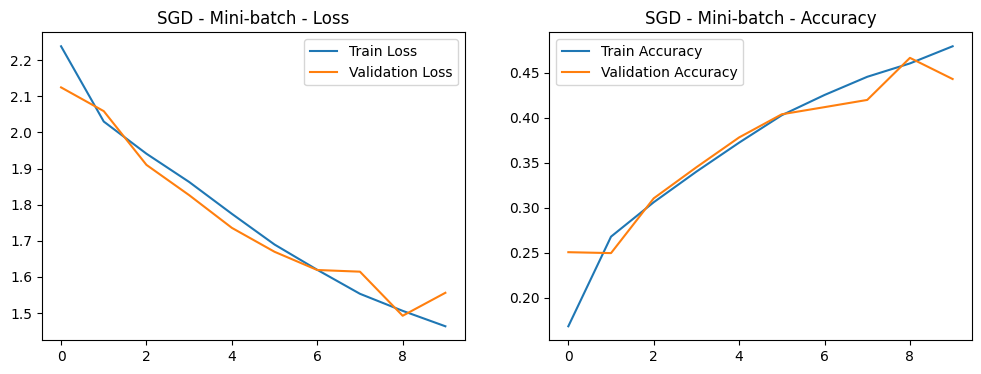

In [6]:
def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title + " - Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + " - Accuracy")
    plt.legend()

    plt.show()

plot_learning_curve(history_sgd, "SGD - Mini-batch")


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.1585 - loss: 4.6199 - val_accuracy: 0.2594 - val_loss: 4.2551
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.2730 - loss: 4.1305 - val_accuracy: 0.2995 - val_loss: 3.8497
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.3098 - loss: 3.7755 - val_accuracy: 0.3271 - val_loss: 3.5341
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.3539 - loss: 3.4509 - val_accuracy: 0.3818 - val_loss: 3.2389
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.3931 - loss: 3.1661 - val_accuracy: 0.4176 - val_loss: 2.9429
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.4240 - loss: 2.9096 - val_accuracy: 0.4304 - val_loss: 2.7575
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4456 - loss: 2.7023 - val_accuracy: 0.3911 - val_loss: 2.8233
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.4591 - loss: 2.5374

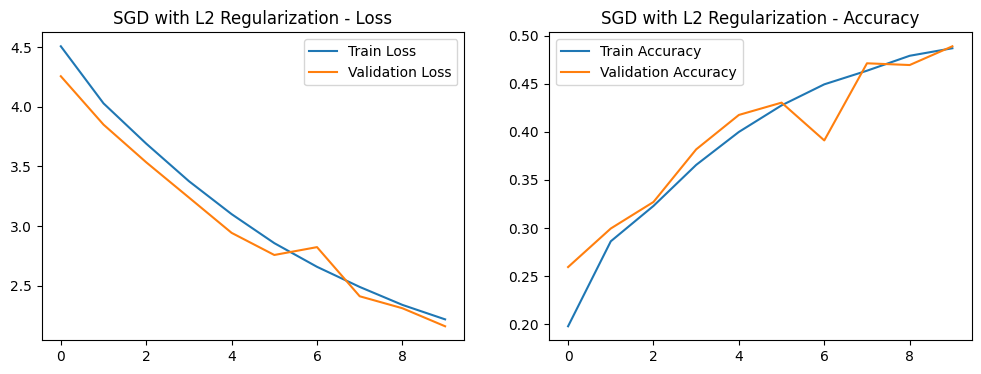

In [7]:
# 5. Add L2 Regularization (Weight Decay)
from tensorflow.keras.regularizers import l2

# Modify the fully connected layer to include L2 regularization
def create_l2_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
        Dense(10, activation='softmax')
    ])
    return model

# Train the L2 model
model_l2 = create_l2_model()
model_l2.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# Compare results
plot_learning_curve(history_l2, "SGD with L2 Regularization")


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 99ms/step - accuracy: 0.1321 - loss: 2.2858 - val_accuracy: 0.2297 - val_loss: 2.1768
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.2267 - loss: 2.1335 - val_accuracy: 0.2780 - val_loss: 1.9961
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.2795 - loss: 1.9854 - val_accuracy: 0.3193 - val_loss: 1.9054
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.3193 - loss: 1.9024 - val_accuracy: 0.3420 - val_loss: 1.8341
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.3511 - loss: 1.8191 - val_accuracy: 0.3995 - val_loss: 1.6963
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.3820 - loss: 1.7249 - val_accuracy: 0.4159 - val_loss: 1.6298
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.4033 - loss: 1.6603 - val_accuracy: 0.4304 - val_loss: 1.5832
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.4275 - loss: 1.5989 - 

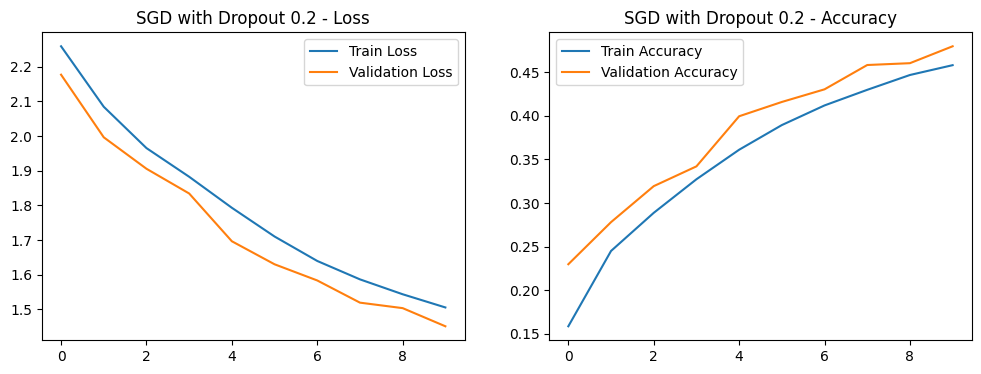

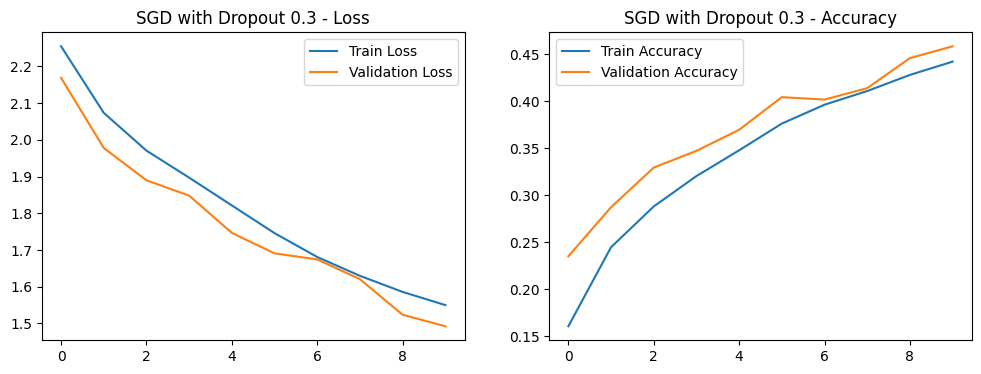

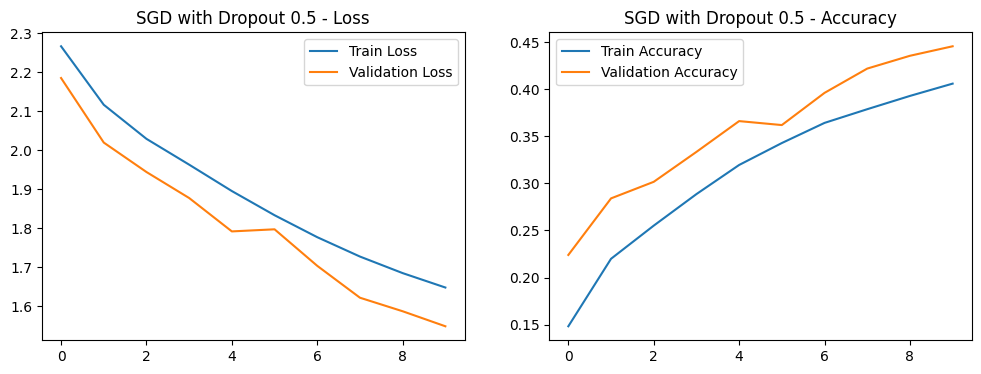

In [8]:
# 6. Add Dropout (0.2, 0.3, 0.5)
from tensorflow.keras.layers import Dropout

def create_dropout_model(dropout_rate):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model

dropout_rates = [0.2, 0.3, 0.5]
histories_dropout = {}

for rate in dropout_rates:
    model_dropout = create_dropout_model(rate)
    model_dropout.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    histories_dropout[rate] = model_dropout.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# Compare dropout results
for rate in dropout_rates:
    plot_learning_curve(histories_dropout[rate], f"SGD with Dropout {rate}")


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.1469 - loss: 2.2815 - val_accuracy: 0.2493 - val_loss: 2.1401
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.2614 - loss: 2.0666 - val_accuracy: 0.2802 - val_loss: 1.9542
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.3125 - loss: 1.9302 - val_accuracy: 0.3077 - val_loss: 1.8994
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.3519 - loss: 1.8346 - val_accuracy: 0.3741 - val_loss: 1.7534
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.3819 - loss: 1.7477 - val_accuracy: 0.4052 - val_loss: 1.6630
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.4096 - loss: 1.6600 - val_accuracy: 0.4298 - val_loss: 1.5846
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.4390 - loss: 1.5768 - val_accuracy: 0.4279 - val_loss: 1.6389
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.4506 - loss: 1.5347 - 

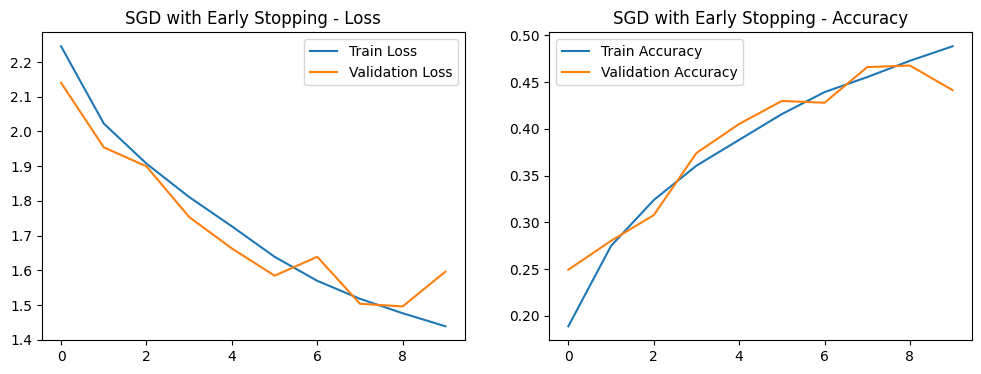

In [9]:
# 7. Apply Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

model_early = create_base_model()
model_early.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_early = model_early.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot results
plot_learning_curve(history_early, "SGD with Early Stopping")


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 144ms/step - accuracy: 0.3004 - loss: 1.9583 - val_accuracy: 0.3994 - val_loss: 1.8829
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 130ms/step - accuracy: 0.4957 - loss: 1.4251 - val_accuracy: 0.3933 - val_loss: 1.6233
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.5548 - loss: 1.2687 - val_accuracy: 0.5182 - val_loss: 1.4142
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.5879 - loss: 1.1711 - val_accuracy: 0.5698 - val_loss: 1.2274
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.6177 - loss: 1.0959 - val_accuracy: 0.5161 - val_loss: 1.3961
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.6406 - loss: 1.0365 - val_accuracy: 0.5937 - val_loss: 1.1737
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.6614 - loss: 0.9835 - val_accuracy: 0.5319 - val_loss: 1.4439
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.6741 - loss: 0

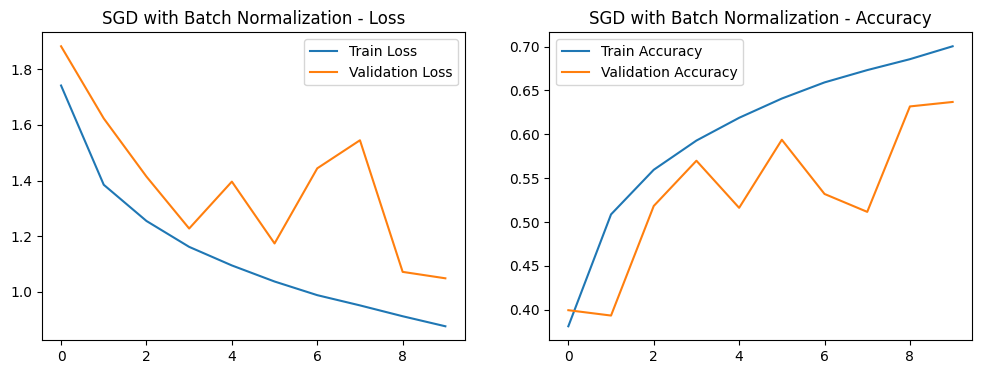

In [12]:
# 8. Add Batch Normalization
from tensorflow.keras.layers import BatchNormalization

def create_batchnorm_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

model_bn = create_batchnorm_model()
model_bn.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_bn = model_bn.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# Plot results
plot_learning_curve(history_bn, "SGD with Batch Normalization")


In [13]:
# 9. Hyperparameter Tuning Using Random Search
from sklearn.model_selection import ParameterSampler
import random

# Define hyperparameter search space
param_grid = {
    "learning_rate": [0.001, 0.01, 0.1],
    "dropout_rate": [0.2, 0.3, 0.5],
    "batch_size": [64, 128, 256]
}

# Generate random combinations of hyperparameters
num_combinations = 5  # Try 5 different random configurations
param_combinations = list(ParameterSampler(param_grid, n_iter=num_combinations, random_state=42))

best_val_acc = 0
best_params = {}
best_model = None

# Try different random configurations
for params in param_combinations:
    print(f"\nTraining model with {params}")

    # Create model with specific dropout
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(params["dropout_rate"]),
        Dense(10, activation='softmax')
    ])

    # Compile model with specific learning rate
    optimizer = SGD(learning_rate=params["learning_rate"])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train, epochs=10, batch_size=params["batch_size"], validation_data=(X_val, y_val), verbose=0)

    # Get validation accuracy
    val_acc = max(history.history["val_accuracy"])  # Best validation accuracy in training

    # Check if this model is the best
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = params
        best_model = model  # Store best model

print(f"\nBest hyperparameters: {best_params} with validation accuracy: {best_val_acc:.4f}")
best_model.save("best_hyperparam_model.h5")



Training model with {'learning_rate': 0.1, 'dropout_rate': 0.5, 'batch_size': 64}

Training model with {'learning_rate': 0.01, 'dropout_rate': 0.3, 'batch_size': 128}

Training model with {'learning_rate': 0.001, 'dropout_rate': 0.2, 'batch_size': 128}

Training model with {'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 256}

Training model with {'learning_rate': 0.001, 'dropout_rate': 0.2, 'batch_size': 64}



Best hyperparameters: {'learning_rate': 0.1, 'dropout_rate': 0.5, 'batch_size': 64} with validation accuracy: 0.6704


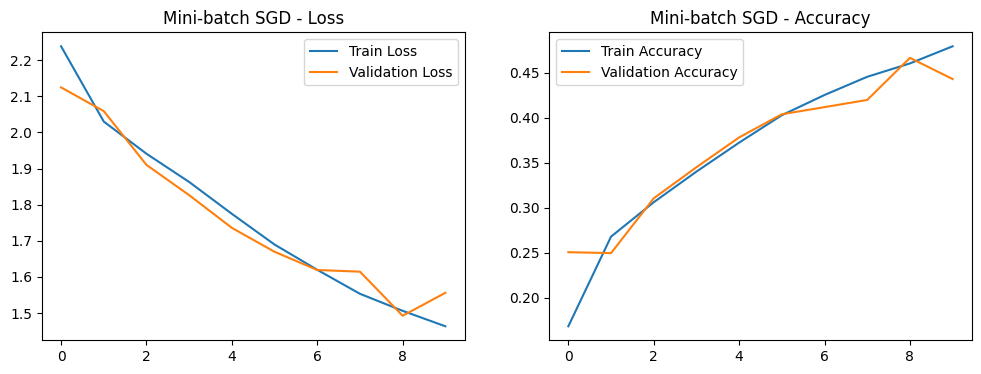

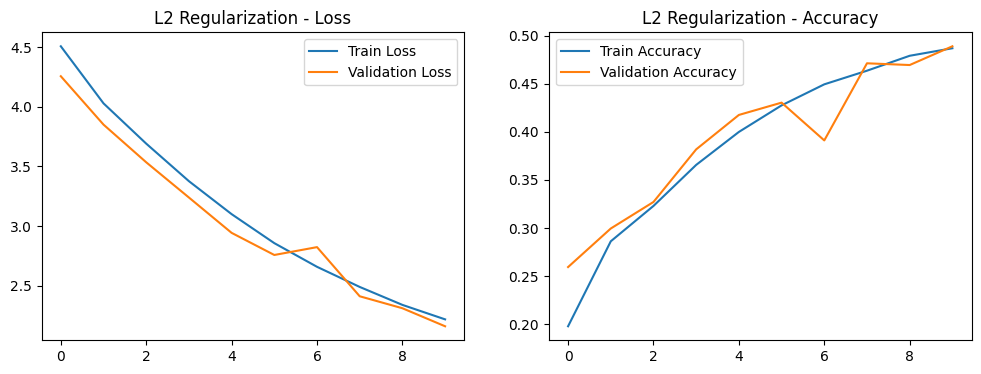

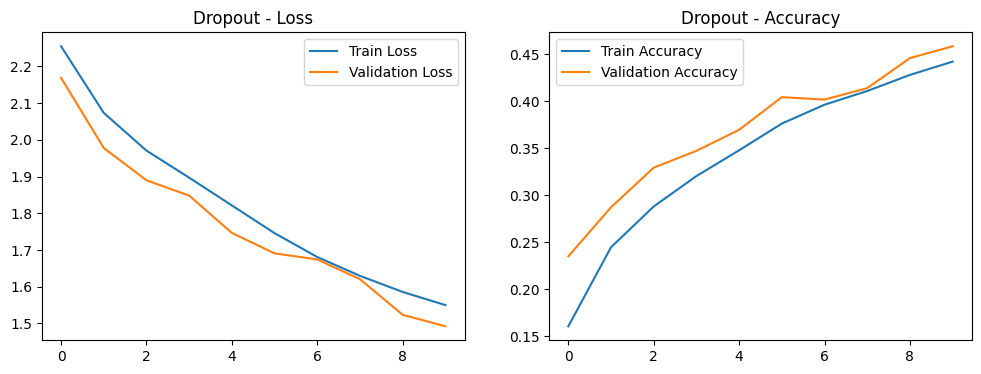

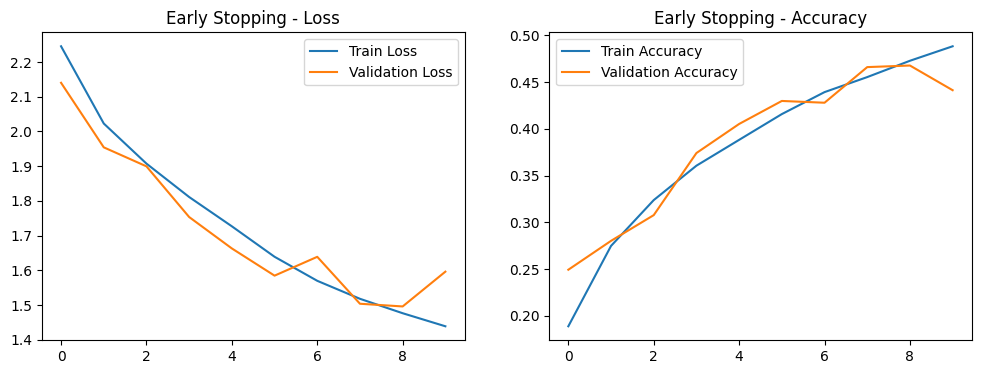

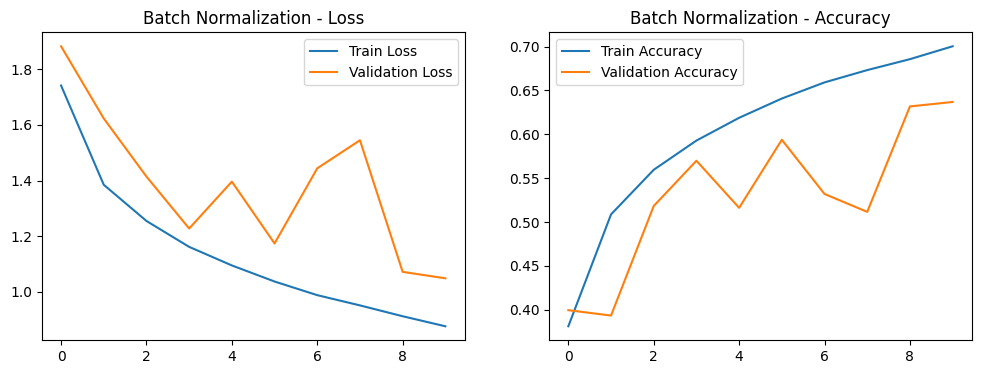

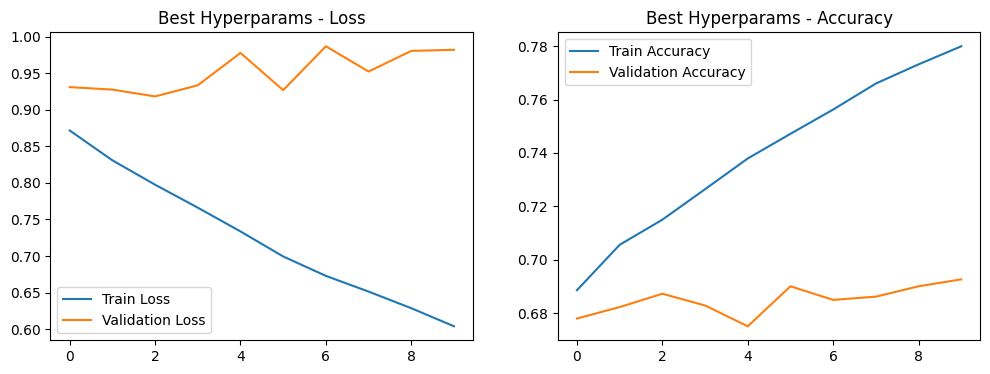

In [14]:
# 10. Present Results and Discussion
# Plot all models' training histories
models_histories = {
    "Mini-batch SGD": history_sgd,
    "L2 Regularization": history_l2,
    "Dropout": histories_dropout[0.3],  # Choose 0.3 dropout
    "Early Stopping": history_early,
    "Batch Normalization": history_bn,
    "Best Hyperparams": best_model.fit(X_train, y_train, epochs=10, batch_size=best_params["batch_size"], validation_data=(X_val, y_val), verbose=0)
}

for name, history in models_histories.items():
    plot_learning_curve(history, name)
